In [1]:
import sdevelo as sv
import scvelo as scv
adata = scv.datasets.gastrulation_erythroid()

args = sv.Config()
args.cuda_device = -1
args.vis_type_col = 'celltype'
args.vis_key = 'X_tsne'
scv.pp.remove_duplicate_cells(adata)

/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing 

(Working on SDEvelo 0.2.12)
2025-01-10 08:26:58


In [ ]:
model = sv.SDENN(args, adata)
adata = model.train(args.nEpochs)

cuda
Filtered out 47456 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
Using scVelo version 0.3.3


/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
2025-01-10 08:27:30.001478: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736497650.177480    2783 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736497650.230621    2783 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
5000
Epoch: 0, Loss: 0.899, alpha: 0.28, beta: 6.00, gamma: 0.01, s1: 0.011, s2: 0.010,  t_m: 0.636,  u_shift: 0.000,  s_shift: 0.000
Epoch: 50, Loss: 0.450, alpha: 2.11, beta: 19.33, gamma: 8.06, s1: 0.012, s2: 0.010,  t_m: 0.339,  u_shift: 0.000,  s_shift: 0.000
Epoch: 100, Loss: 0.473, alpha: 2.36, beta: 25.82, gamma: 10.99, s1: 0.067, s2: 0.022,  t_m: 0.380,  u_shift: 0.000,  s_shift: 0.000
Epoch: 150, Loss: 0.517, alpha: 2.64, beta: 31.77, gamma: 13.79, s1: 0.084, s2: 0.036,  t_m: 0.412,  u_shift: 0.000,  s_shift: 0.000
Epoch: 200, Loss: 0.626, alpha: 3.56, beta: 37.19, gamma: 16.44, s1: 0.113, s2: 0.060,  t_m: 0.452,  u_shift: 0.000,  s_shift: 0.000
Epoch: 250, Loss: 0.707, alpha: 4.21, beta: 37.38, gamma: 16.36, s1: 0.010, s2: 0.047,  t_m: 0.418,  u_shift: 0.000,  s_shift: 0.000


In [3]:
adata.write_h5ad("./sdevelo.h5ad")

In [4]:
adata

AnnData object with n_obs × n_vars = 9815 × 2000
    obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'latent_time'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'MURK_gene', 'Δm', 'scaled Δm', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_sigma_1', 'fit_sigma_2'
    uns: 'celltype_colors', 'log1p', 'pca', 'neighbors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'sde_velocity', 'pred_u', 'pred_s'
    obsp: 'distances', 'connectivities'

In [8]:
import scanpy as sc

sc.pp.neighbors(adata)
sc.tl.umap(adata)

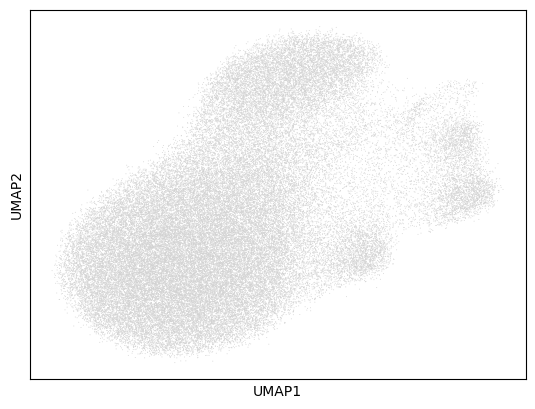

In [11]:
sc.pl.umap(adata)

In [14]:
u_fake, s_fake = model.generate()

In [15]:
import numpy as np

combined_data = np.vstack([adata.layers["spliced"].toarray(), s_fake])

In [16]:
from anndata import AnnData

# Create a combined AnnData object
combined_adata = AnnData(combined_data)

# Add labels to distinguish real and simulated data
combined_adata.obs['source'] = ['real'] * adata.n_obs + ['simulated'] * s_fake.shape[0]

combined_adata.var = adata.var

In [17]:
sc.pp.neighbors(combined_adata)
sc.tl.umap(combined_adata)

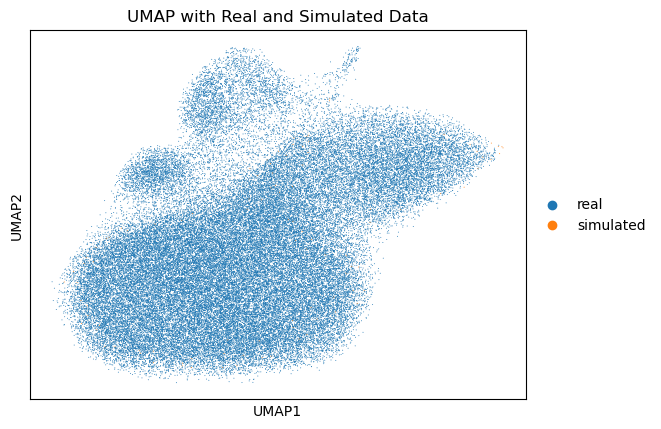

In [18]:
import matplotlib.pyplot as plt

sc.pl.umap(combined_adata, color='source', title='UMAP with Real and Simulated Data')

In [19]:
point_sizes = np.where(
    combined_adata.obs['source'] == "simulated", 
    200,  # Larger size for underrepresented class
    50    # Default size for other classes
)

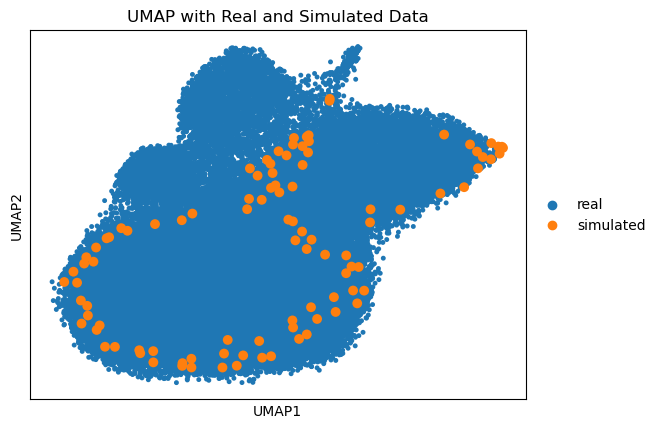

In [20]:
import matplotlib.pyplot as plt

sc.pl.umap(combined_adata, color='source', title='UMAP with Real and Simulated Data', size=point_sizes)

In [24]:
adata.layers["sde_velocity"].shape

(65877, 601)

In [29]:
adata.var

,Accession,Chromosome,End,Start,Strand,fit_alpha,fit_beta,fit_gamma,fit_t_,fit_sigma_1,fit_sigma_2
Gene,,,,,,,,,,,
FAAP20,ENSG00000162585,1,2212720,2184461,-,0.010000,31.787270,100.000000,0.406292,0.311072,0.010000
ENO1,ENSG00000074800,1,8879250,8861000,-,3.007205,170.379562,10.961662,0.102272,0.134473,0.011164
CAPZB,ENSG00000077549,1,19485539,19338775,-,4.731376,140.187836,17.794563,0.103482,0.327631,0.010077
SRSF10,ENSG00000188529,1,23980927,23964804,-,0.641071,10.068281,100.000000,0.866057,0.010000,0.036051
FGR,ENSG00000000938,1,27635185,27612064,-,22.593721,467.048553,99.827934,0.100000,0.010000,0.260453
...,...,...,...,...,...,...,...,...,...,...,...
MSN,ENSG00000147065,X,65741931,65588377,+,1.454279,34.748112,51.461494,0.100000,0.094617,0.365735
PGK1,ENSG00000102144,X,78129295,77910739,+,2.273357,143.980789,15.761808,0.100000,0.161513,0.013225
SH3BGRL,ENSG00000131171,X,81298547,81202102,+,0.595336,26.773293,52.701050,0.100000,0.063544,0.589655


computing velocity graph (using 6/6 cores)


  0%|          | 0/65877 [00:00<?, ?cells/s]

/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/haziq/mambaforge/envs/hgsoc/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing 

    finished (0:01:02) --> added 
    'sde_velocity_graph', sparse matrix with cosine correlations (adata.uns)
--> added 'sde_velocity_length' (adata.obs)
--> added 'sde_velocity_confidence' (adata.obs)
--> added 'sde_velocity_confidence_transition' (adata.obs)
computing velocity embedding
    finished (0:00:09) --> added
    'sde_velocity_tsne', embedded velocity vectors (adata.obsm)


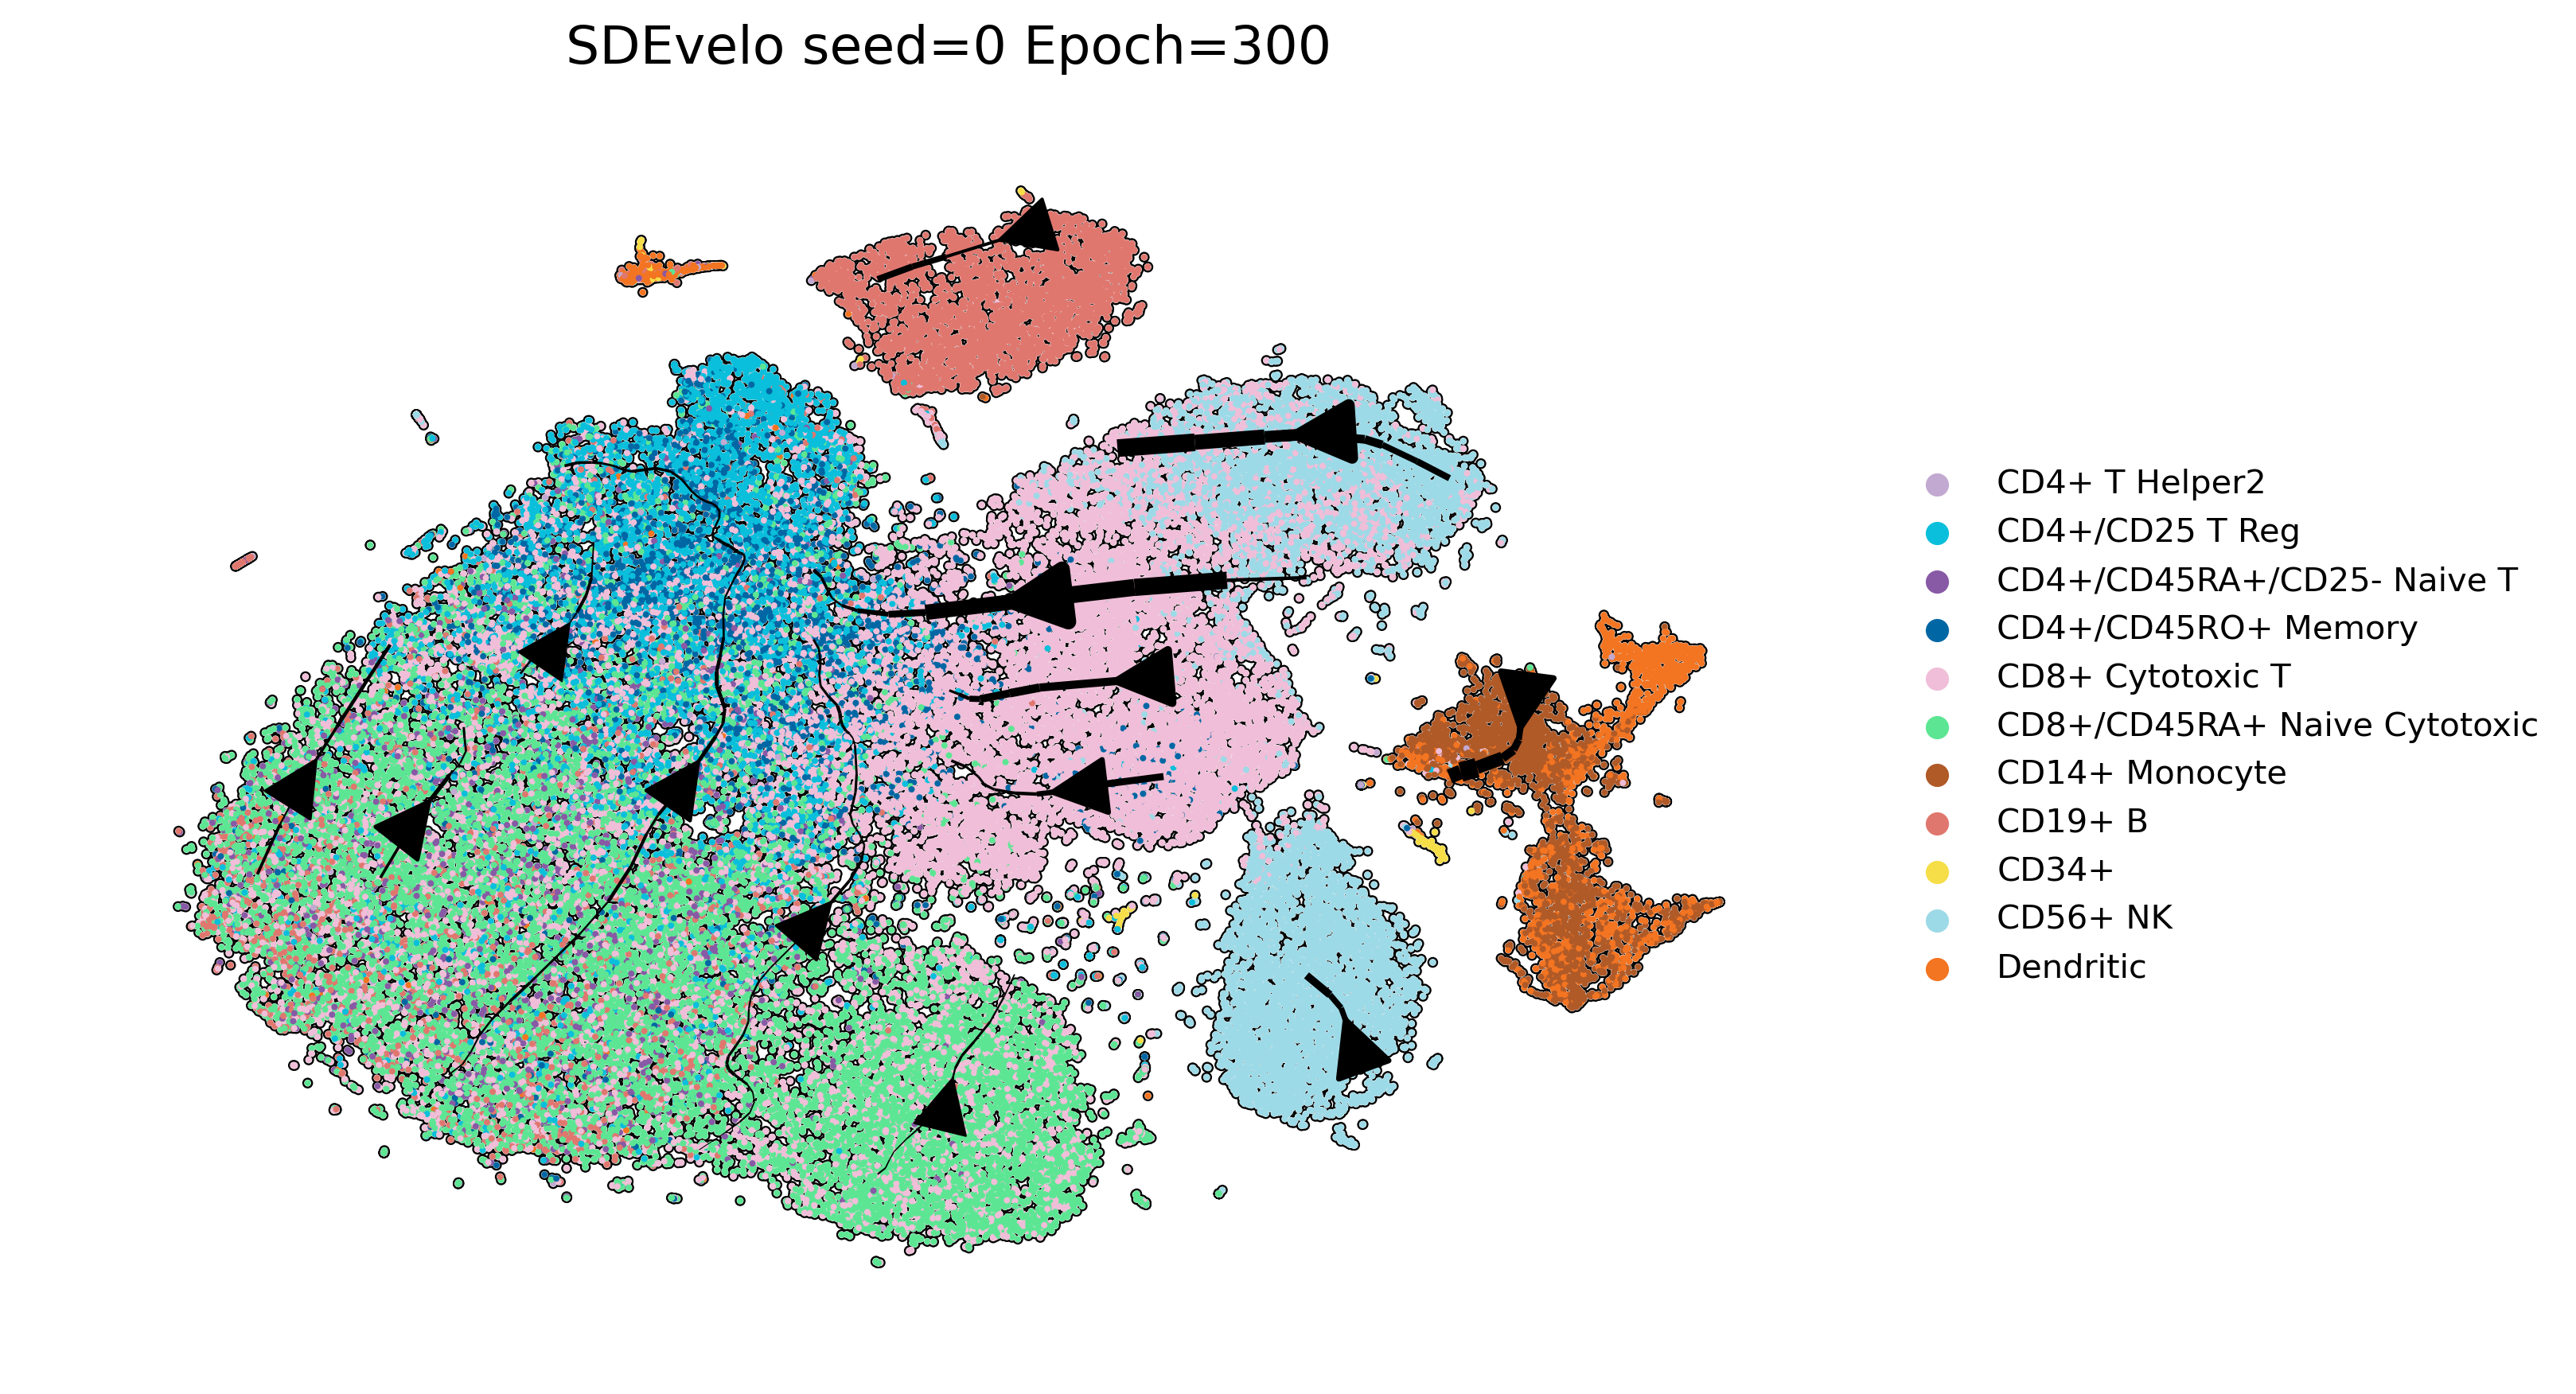

In [25]:
celltype_colors = {
    'CD8+ Cytotoxic T': "#F0BED8", 'CD8+/CD45RA+ Naive Cytotoxic': "#5CE693",
    'CD4+/CD45RO+ Memory': "#0067a4", 'CD19+ B': "#E0776F",
    'CD4+/CD25 T Reg': "#0abfdb", 'CD56+ NK': "#9ddae7",
    'CD4+ T Helper2': "#c2a9d1", 'CD4+/CD45RA+/CD25- Naive T': "#8859a5",
    'CD34+': "#f5de47", 'Dendritic': "#f37421", 'CD14+ Monocyte': "#b05a28"}
adata.uns['celltype_colors'] = celltype_colors
kwargs = dict(fontsize=16, density=0.4, add_margin=.1, arrow_size=4, linewidth=5, smooth=0.08, alpha=1.0, figsize=(10, 7), add_outline=True)
sv.plot_streamline(adata, args, **kwargs)